In [1]:
#Import all the necessary modules
import pandas as pd
import numpy as np
import os
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import Imputer
from sklearn.linear_model import LinearRegression
from sklearn.decomposition import PCA
from sklearn.metrics import mean_squared_error
%matplotlib inline

In [2]:
data_df = pd.read_csv("concrete.csv")
data_df.head(5)

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
0,141.3,212.0,0.0,203.5,0.0,971.8,748.5,28,29.89
1,168.9,42.2,124.3,158.3,10.8,1080.8,796.2,14,23.51
2,250.0,0.0,95.7,187.4,5.5,956.9,861.2,28,29.22
3,266.0,114.0,0.0,228.0,0.0,932.0,670.0,28,45.85
4,154.8,183.4,0.0,193.3,9.1,1047.4,696.7,28,18.29


# Deliverable -1.a (Exploratory data quality report reflecting UniVariate Analysis)

In [3]:
data_df.describe(include='all') # central values and other statistical information of attributes

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
count,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000
mean,281.167864,73.895825,54.188350,181.567282,6.204660,972.918932,773.580485,45.662136,35.817961
std,104.506364,86.279342,63.997004,21.354219,5.973841,77.753954,80.175980,63.169912,16.705742
min,102.000000,0.000000,0.000000,121.800000,0.000000,801.000000,594.000000,1.000000,2.330000
25%,192.375000,0.000000,0.000000,164.900000,0.000000,932.000000,730.950000,7.000000,23.710000
50%,272.900000,22.000000,0.000000,185.000000,6.400000,968.000000,779.500000,28.000000,34.445000
75%,350.000000,142.950000,118.300000,192.000000,10.200000,1029.400000,824.000000,56.000000,46.135000
max,540.000000,359.400000,200.100000,247.000000,32.200000,1145.000000,992.600000,365.000000,82.600000


In [4]:
data_df.dtypes # datatypes of attributes

cement          float64
slag            float64
ash             float64
water           float64
superplastic    float64
coarseagg       float64
fineagg         float64
age               int64
strength        float64
dtype: object

In [5]:
data_df.info () # Data set doesn't contain any NULL values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 9 columns):
cement          1030 non-null float64
slag            1030 non-null float64
ash             1030 non-null float64
water           1030 non-null float64
superplastic    1030 non-null float64
coarseagg       1030 non-null float64
fineagg         1030 non-null float64
age             1030 non-null int64
strength        1030 non-null float64
dtypes: float64(8), int64(1)
memory usage: 72.5 KB


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000024C9197F048>,
      dtype=object)

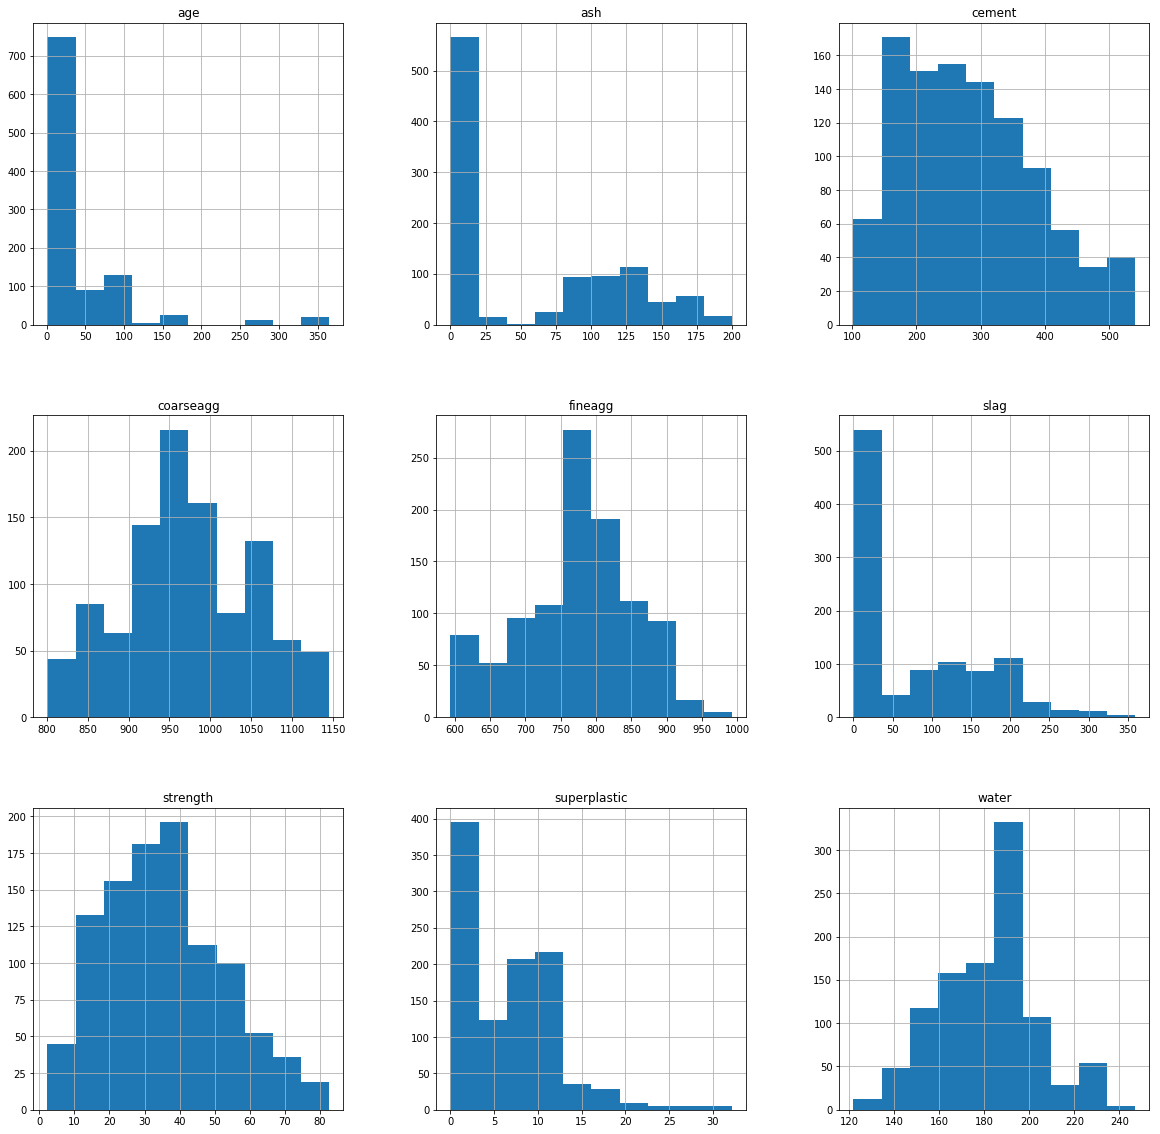

In [6]:
data_df.hist(figsize=(20,20))
# ash - Almost 50% records (567 records) are having 0 values.
# Age - Almost 90% (940 records) are having values in range of 1 through 100
# Cement - Data is right skewed and having right extended tail
# coarseagg - Though it shows normal distribution but data seem to be taken from multiple samples and thats why we could see 3 peaks in distribution
# fineagg - It is symetrically distributed but it has extended left tail
# slag - Around 50% records (567 records) are below 50 and eventually distort the distribution
# superplastic - Data is left skewed and 50% datapoints are falling in 25-50% quartile range
# Water - Shows close to normal distribution with an additional peak on right tail (shows data fetched from 2 different samples)

# Univariate distribution through distplot

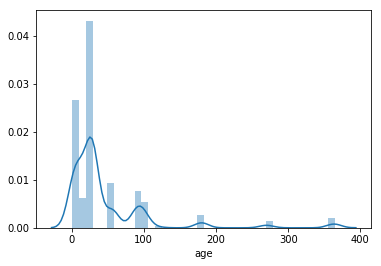

In [7]:
sns.distplot(data_df['age'])

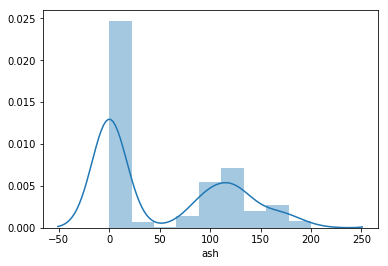

In [8]:
sns.distplot(data_df['ash'])

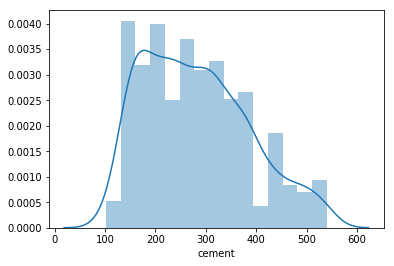

In [9]:
sns.distplot(data_df['cement'])

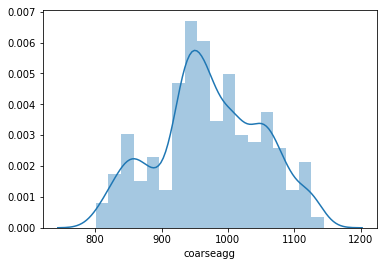

In [10]:
sns.distplot(data_df['coarseagg'])

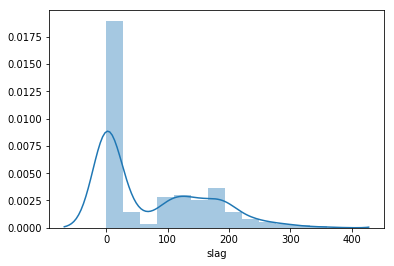

In [11]:
sns.distplot(data_df['slag'])

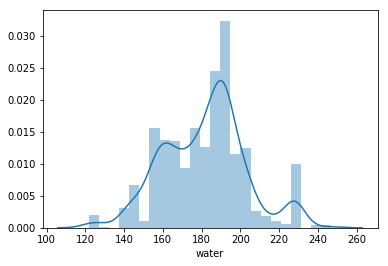

In [12]:
sns.distplot(data_df['water'])

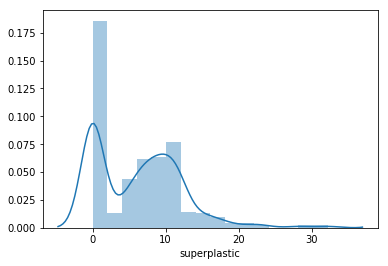

In [13]:
sns.distplot(data_df['superplastic'])

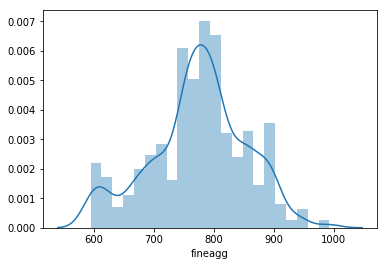

In [14]:
sns.distplot(data_df['fineagg'])

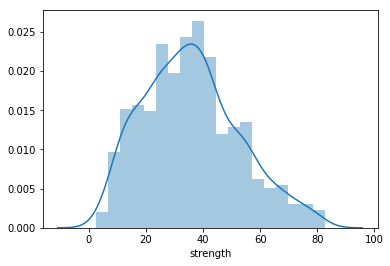

In [15]:
sns.distplot(data_df['strength'])

# Deliverable -1.b (Exploratory data quality report reflecting Multivariate Analysis) 

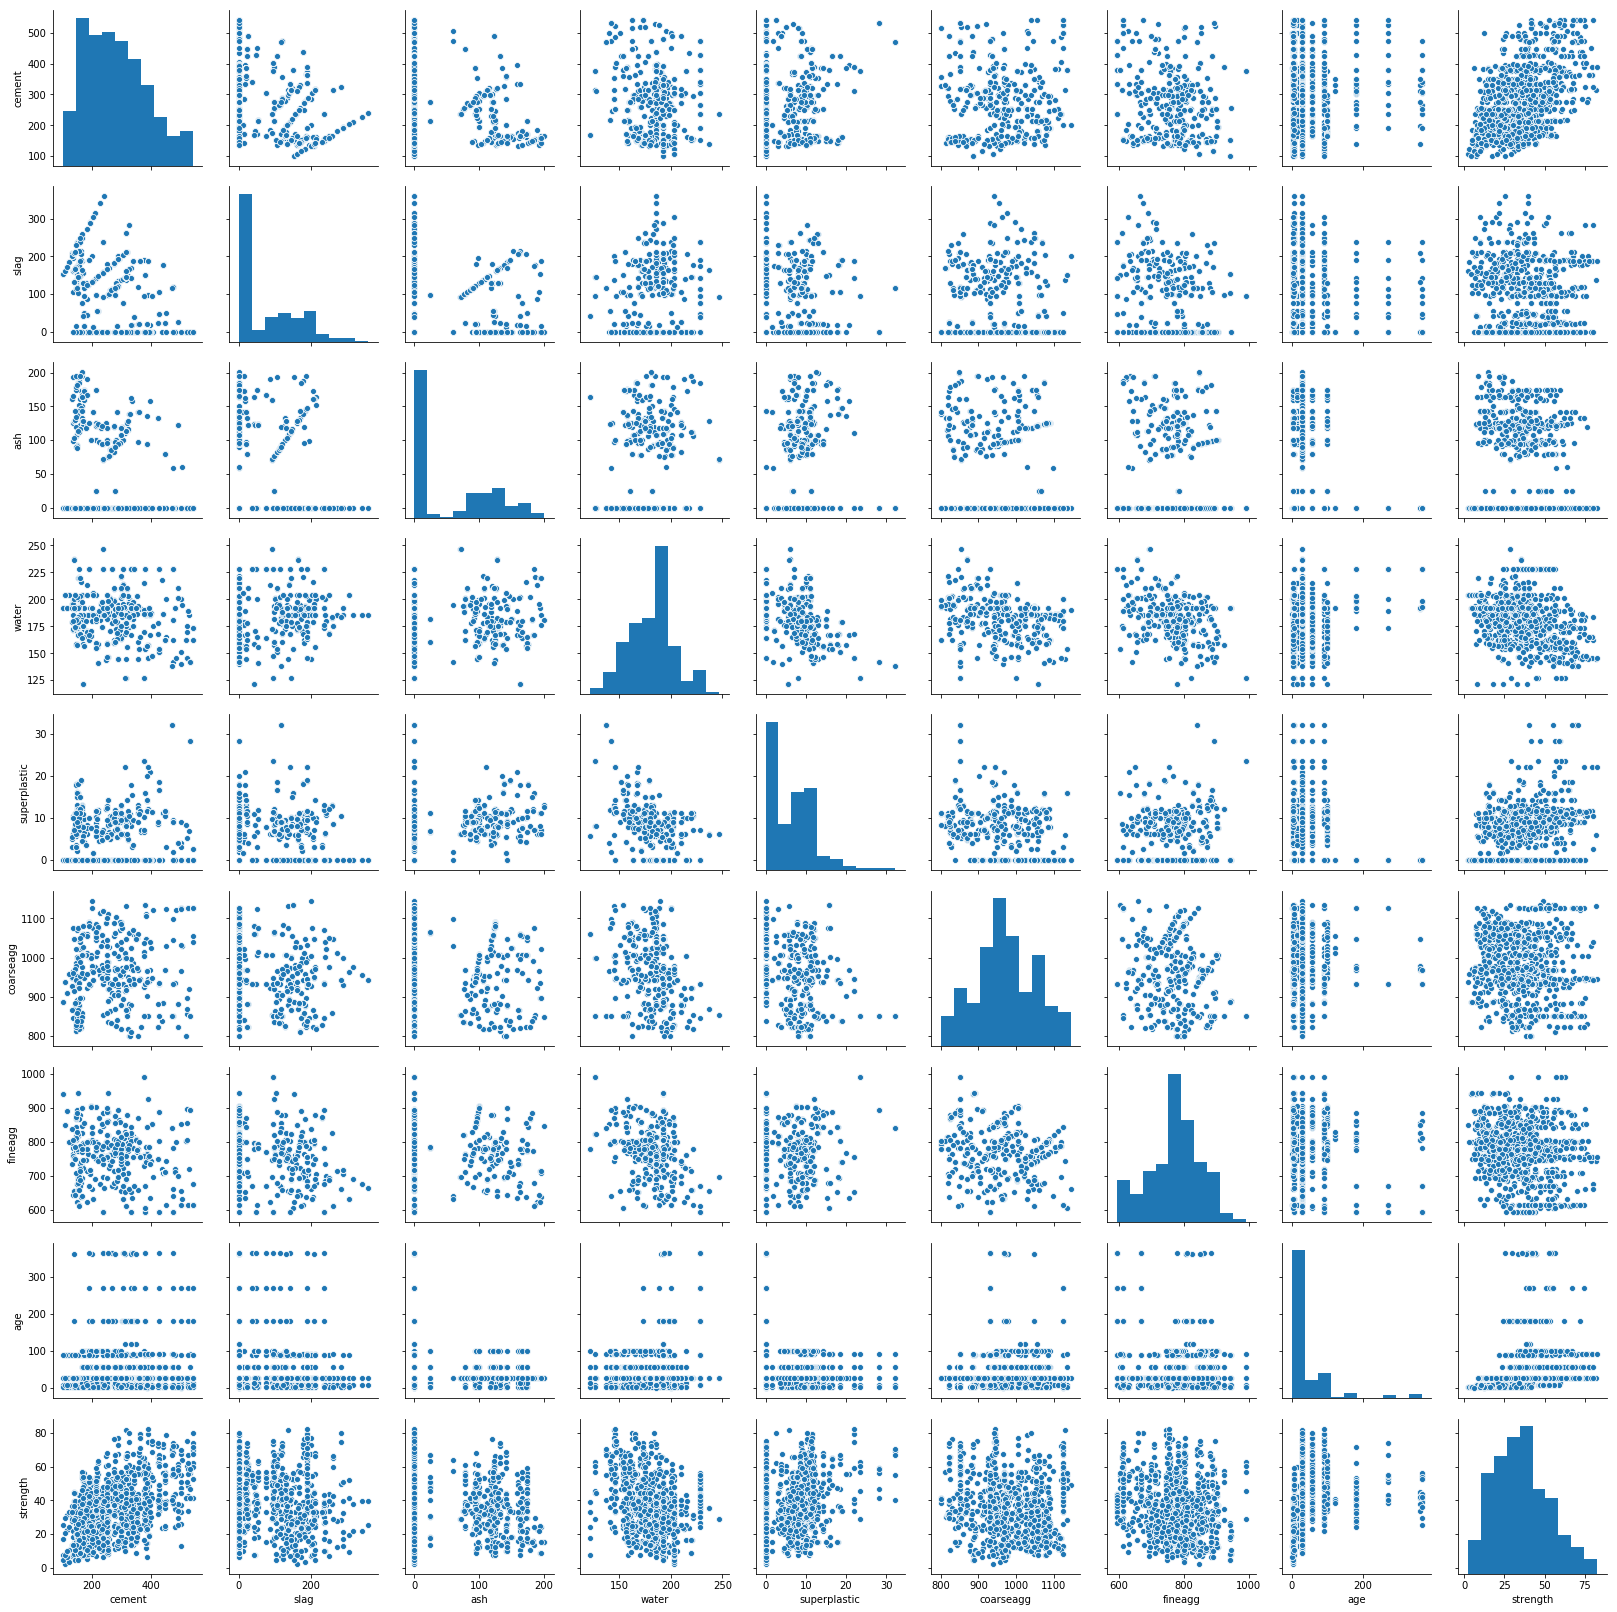

In [16]:
sns.pairplot(data_df)
# Strength and Cement shows linear relationship though there is cloud around and its not perfectly linear
# Water and Superplastic shows inverse relationship
# Water and cement has no solid relationship and rather its a cloud

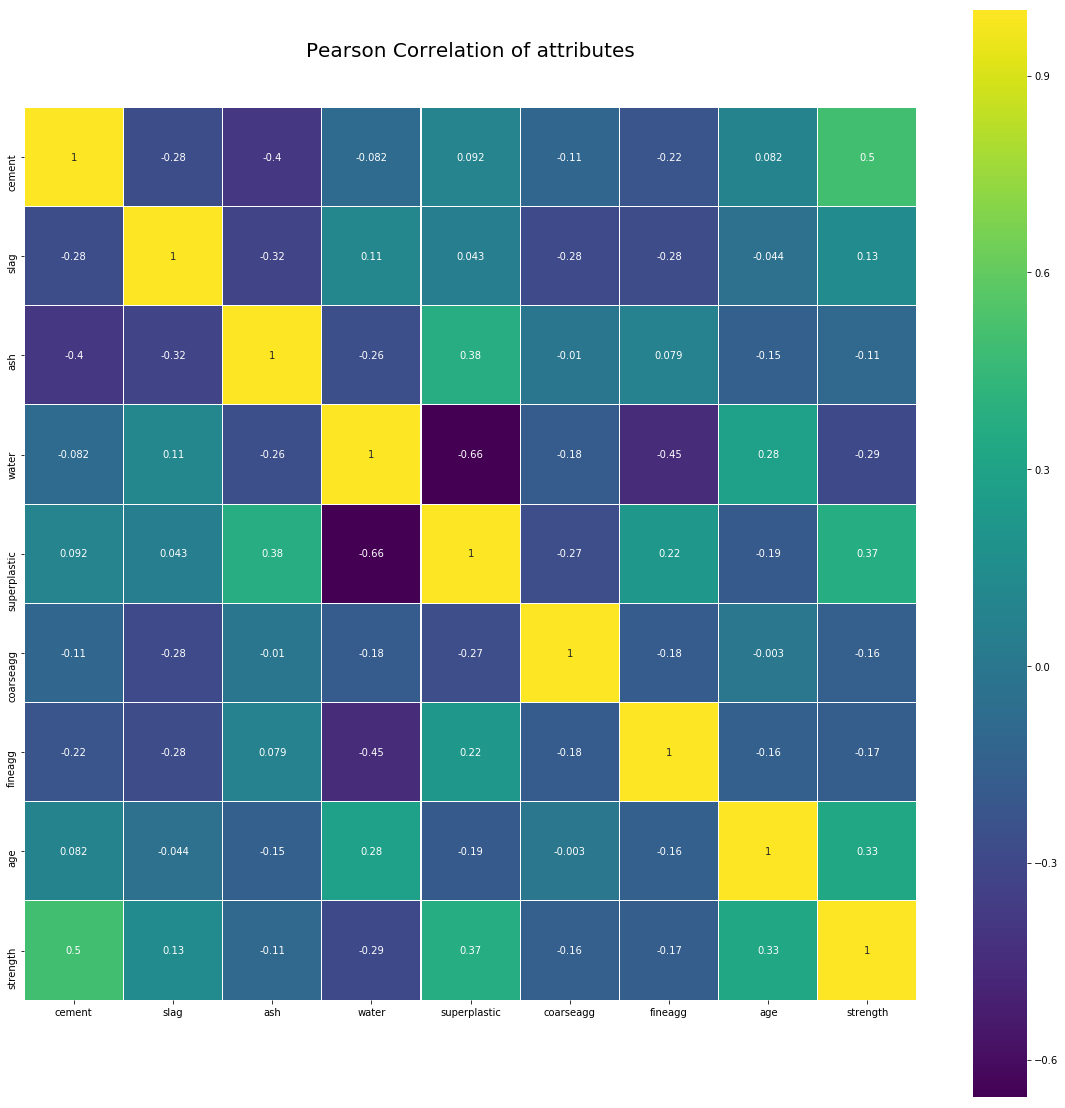

In [17]:
colormap = plt.cm.viridis # Color range to be used in heatmap
plt.figure(figsize=(20,20))
plt.title('Pearson Correlation of attributes', y=1.05, size=20)
sns.heatmap(data_df.corr(),linewidths=0.1,vmax=1.0, 
            square=True, cmap=colormap, linecolor='white', annot=True)

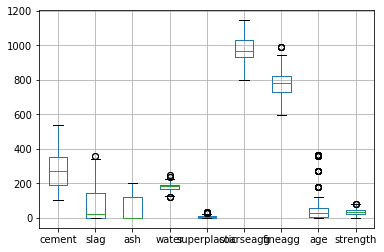

In [18]:
boxplot = data_df.boxplot(column=['cement', 'slag', 'ash','water','superplastic','coarseagg','fineagg','age','strength'])
# Outliers noticed in following independent attributes - 
# slag, water,superplastic,fineagg,age

# Deliverable 1.c Strategies to address data pollution/missing values and outliers 

In [19]:
data_df.info () # Data set doesn't contain any NULL values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 9 columns):
cement          1030 non-null float64
slag            1030 non-null float64
ash             1030 non-null float64
water           1030 non-null float64
superplastic    1030 non-null float64
coarseagg       1030 non-null float64
fineagg         1030 non-null float64
age             1030 non-null int64
strength        1030 non-null float64
dtypes: float64(8), int64(1)
memory usage: 72.5 KB


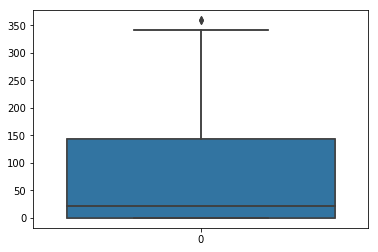

In [20]:
# 2 outliers in slag
sns.boxplot(data=data_df.slag)
data_df["slag"] = data_df["slag"].mask(data_df["slag"] > 350, data_df['slag'].median())
# 2 outliers removed
sns.boxplot(data=data_df.slag)

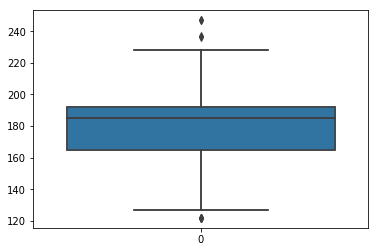

In [21]:
# 2 outliers in water
sns.boxplot(data=data_df.water)
data_df["water"] = data_df["water"].mask(data_df["water"] > 230, data_df['water'].median())
data_df["water"] = data_df["water"].mask(data_df["water"] < 122, data_df['water'].median())
# 2 outliers removed
sns.boxplot(data=data_df.water)

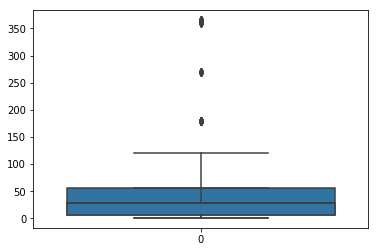

In [22]:
# 5 outliers in water
sns.boxplot(data=data_df.age)
data_df["age"] = data_df["age"].mask(data_df["age"] > 56, data_df['age'].median())
#data_df["water"] = data_df["water"].mask(data_df["water"] < 122, data_df['water'].median())
# 2 outliers removed
sns.boxplot(data=data_df.age)

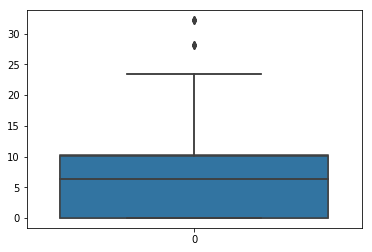

In [23]:
# 8 outliers in water
sns.boxplot(data=data_df.superplastic)
data_df["superplastic"] = data_df["superplastic"].mask(data_df["superplastic"] > 25, data_df['superplastic'].median())
sns.boxplot(data=data_df.superplastic)

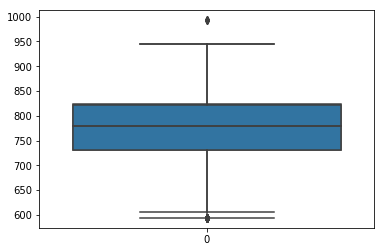

In [24]:
# 3 outliers in fineagg
# We are not much concerned about fineagg because it is not included as part of feature extraction.
sns.boxplot(data=data_df.fineagg)
data_df["fineagg"] = data_df["fineagg"].mask(data_df["fineagg"] > 990, data_df['fineagg'].median())
sns.boxplot(data=data_df.fineagg)

In [25]:
# replace the missing values in columns :Note, we do not need to specify the column names
# every column's missing value is replaced with that column's median respectively  (axis =0 means columnwise)
#data_df = data_df.fillna(data_df.median())
from sklearn.preprocessing import Imputer
data_df = data_df.apply(lambda x: x.fillna(x.median()),axis=0)

# We don't require Imputer to be used here because the dataframe doesn't contain any null value/s.
imr = Imputer(missing_values='NaN', strategy='median', axis=0)
#imr = imr.fit(data_df)
#imputed_data = imr.transform(data_df.values)


C:\Users\VK186001\AppData\Roaming\Python\Python37\site-packages\sklearn\utils\deprecation.py:66: DeprecationWarning: Class Imputer is deprecated; Imputer was deprecated in version 0.20 and will be removed in 0.22. Import impute.SimpleImputer from sklearn instead.
  warnings.warn(msg, category=DeprecationWarning)


# Analysis of Deliverable 1 :- 
# Following attributes should be used for model development - 
# Cement, age,superplastic,slag,water
# ash, coarseagg,fineagg should not be included as they show -ve correlation and they have cloudy relationship with target variable (Strength attribute)

# Deliverable -2.a & 2.b (Feature Engineering techniques) - 
# Identify Feature and decide complexity of model (linear or higher degree)

In [26]:
from scipy.stats import zscore
data_df_z = data_df.apply(zscore)
# Copy all the predictor variables into X dataframe. Since 'strength' is dependent variable drop it
X = data_df_z.drop('strength', axis=1)
y = data_df_z[['strength']]
# Copy the 'strength' column alone into the y dataframe. This is the dependent variable


In [49]:
#Let us break the X and y dataframes into training set and test set. For this we will use
#Sklearn package's data splitting function which is based on random function

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=1)

regression_model = LinearRegression()
regression_model.fit(X_train, y_train)

# invoke the LinearRegression function and find the bestfit model on training data

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [50]:
# Let us explore the coefficients for each of the independent attributes

for idx, col_name in enumerate(X_train.columns):
    print("The coefficient for {} is {}".format(col_name, regression_model.coef_[0][idx]))

The coefficient for cement is 0.6784978328351505
The coefficient for slag is 0.3846441219732393
The coefficient for ash is 0.13902724045650455
The coefficient for water is -0.16421006803770805
The coefficient for superplastic is 0.049102854948289816
The coefficient for coarseagg is 0.047710431544947716
The coefficient for fineagg is 0.04228154652225329
The coefficient for age is 0.5185776953745578


In [29]:
# Let us check the intercept for the model

intercept = regression_model.intercept_[0]

print("The intercept for our model is {}".format(intercept))

The intercept for our model is -0.008825363154666812


In [30]:
regression_model.score(X_train, y_train)

0.7235047266326935

In [31]:
# Model score - R2 or coeff of determinant
# R^2=1–RSS / TSS =  RegErr / TSS

regression_model.score(X_test, y_test)

0.7116718221401639

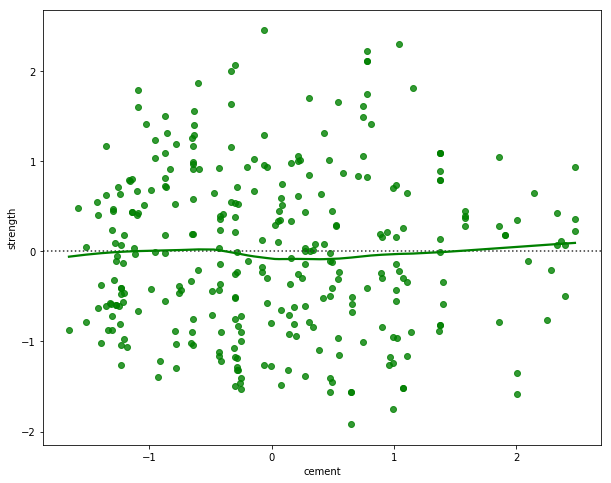

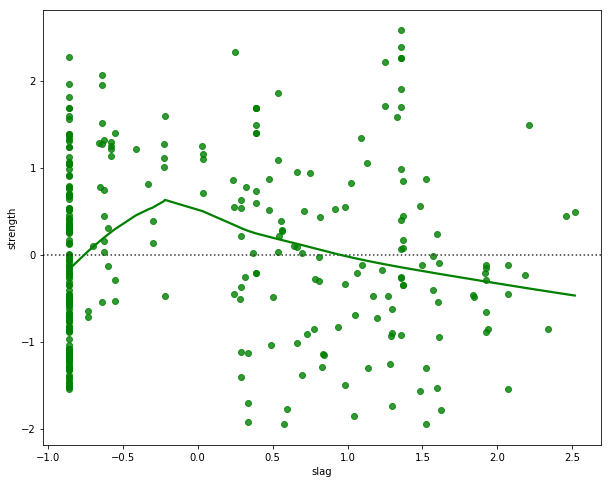

In [32]:
# Is OLS a good model ? Should we building a simple linear model ? Check the residuals for each predictor.

fig = plt.figure(figsize=(10,8))
sns.residplot(x= X_test['cement'], y= y_test['strength'], color='green', lowess=True )


fig = plt.figure(figsize=(10,8))
sns.residplot(x= X_test['slag'], y= y_test['strength'], color='green', lowess=True )

In [33]:
# The model explains 72% of the variability in Y using X

In [34]:
# R^2 is not a reliable metric as it always increases with addition of more attributes even if the attributes have no 
# influence on the predicted variable. Instead we use adjusted R^2 which removes the statistical chance that improves R^2
# Scikit does not provide a facility for adjusted R^2... so we use 
# statsmodel, a library that gives results similar to adjusted R^2 what you obtain in R language
# This library expects the X and Y to be given in one single dataframe

data_train = pd.concat([X_train, y_train], axis=1)
data_train.head()


,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
185,0.658961,-0.858192,-0.847144,1.036599,-1.091166,0.013910,0.031195,-0.690398,-0.795799
286,0.888723,1.358745,-0.847144,-0.561016,0.753750,-0.602435,-0.201437,0.300203,1.741687
600,-0.039901,-0.858192,-0.847144,0.453882,-1.091166,-0.063294,1.060878,-1.468727,-1.464756
691,0.946164,0.254963,-0.847144,2.250592,-1.091166,-0.526517,-2.269700,-1.185698,-0.179544
474,0.716401,-0.858192,1.372788,0.551002,0.918148,-2.212138,0.069332,0.300203,0.302560


In [35]:
import statsmodels.formula.api as smf
lm1 = smf.ols(formula= 'strength ~ cement+slag+ash+water+superplastic+coarseagg+fineagg+age', data = data_train).fit()
lm1.params

Intercept      -0.008825
cement          0.678498
slag            0.384644
ash             0.139027
water          -0.164210
superplastic    0.049103
coarseagg       0.047710
fineagg         0.042282
age             0.518578
dtype: float64

In [36]:
print(lm1.summary())  #Inferential statistics

                            OLS Regression Results                            
Dep. Variable:               strength   R-squared:                       0.724
Model:                            OLS   Adj. R-squared:                  0.720
Method:                 Least Squares   F-statistic:                     232.9
Date:                Sun, 03 Nov 2019   Prob (F-statistic):          5.06e-193
Time:                        15:43:02   Log-Likelihood:                -552.75
No. Observations:                 721   AIC:                             1124.
Df Residuals:                     712   BIC:                             1165.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept       -0.0088      0.020     -0.451   

In [37]:
# Let us check the sum of squared errors by predicting value of y for test cases and 
# subtracting from the actual y for the test cases

mse = np.mean((regression_model.predict(X_test)-y_test)**2)
# underroot of mean_sq_error is standard deviation i.e. avg variance between predicted and actual

import math

math.sqrt(mse)

0.5486112529939106

In [38]:
# so there is avg of 0.55 (roundoff) strength difference from real strength on an avg

In [39]:
# predict strength for a set of attributes not in the training or test set
y_pred = regression_model.predict(X_test)

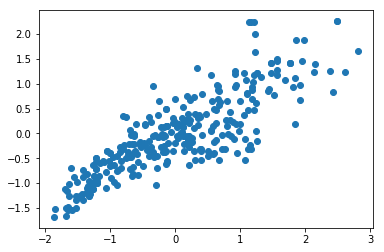

In [40]:
# Since this is regression, plot the predicted y value vs actual y values for the test data
# A good model's prediction will be close to actual leading to high R and R2 values
plt.scatter(y_test['strength'], y_pred)

#  As per above findings (intercept, R-squared and various coefficients) Linear regression model should be the best choice

# Feature Selection

In [41]:
# Evaluate using Cross Validation
from sklearn import model_selection
from mlxtend.feature_selection import SequentialFeatureSelector as sfs

In [42]:
print('Training dataset shape:', X_train.shape, y_train.shape)
print('Testing dataset shape:', X_test.shape, y_test.shape)

Training dataset shape: (721, 8) (721, 1)
Testing dataset shape: (309, 8) (309, 1)


In [43]:
# Build Lin Reg  to use in feature selection
linR = LinearRegression()

In [44]:
results = model_selection.cross_val_score(model, X, y, scoring='neg_mean_squared_error', cv=kfold)
#print("Mean Square Error: %.3f %.3f)" %  results.std())
print(" Mean Square Error is  %2.3f" % results.mean() , results.std())

NameError: name 'model' is not defined

In [ ]:
# Build step forward feature selection
sfs1 = sfs(linR, k_features=5, forward=True, scoring='r2', cv=5)

In [ ]:
# Perform SFFS
sfs1 = sfs1.fit(X_train.values, y_train.values)

In [ ]:
sfs1.get_metric_dict()

In [ ]:
from mlxtend.plotting import plot_sequential_feature_selection as plot_sfs
import matplotlib.pyplot as plt

In [ ]:
fig = plot_sfs(sfs1.get_metric_dict())

plt.title('Sequential Forward Selection (w. R^2)')
plt.grid()
plt.show()

In [ ]:
# Which features?
columnList = list(X_train.columns)
feat_cols = list(sfs1.k_feature_idx_)
print(feat_cols)

In [ ]:
subsetColumnList = [columnList[i] for i in feat_cols] 
print(subsetColumnList)

# Cement, Slag,Ash,Water,Age are selected features
# superplastic, coarseagg and fineagg attributes 

# Deliverable - 2.C  Explore Gaussians and individual clusters

In [ ]:
from scipy.stats import zscore

mpg_df_attr = data_df.loc[:, 'cement':'strength']
mpg_df_attr_z = mpg_df_attr.apply(zscore)

mpg_df_attr_z.pop('superplastic')      # Remove "origin" and "yr" columns
mpg_df_attr_z.pop('coarseagg')
mpg_df_attr_z.pop('fineagg')

array = mpg_df_attr_z.values
X = array[:,0:4] # select all rows and first 5 columns which are the attributes
y = array[:,5]   # select all rows and the 6th column
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=1)


In [ ]:
mpg_df_attr_z.head()

In [ ]:
from sklearn import svm
clr = svm.SVR()  
clr.fit(X_train , y_train)

In [ ]:
y_pred = clr.predict(X_test)

In [ ]:
import seaborn as sns
sns.set(style="darkgrid", color_codes=True)            
#g = sns.jointplot("y_actuals", "y_predicted", data=tips, kind="reg",
#                  xlim=(0, 60), ylim=(0, 12), color="r", size=7)
            
with sns.axes_style("white"):
    sns.jointplot(x=y_test, y=y_pred, kind="reg", color="k");
    
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score, classification_report, precision_score, recall_score 
from sklearn.metrics import confusion_matrix, precision_recall_curve, roc_curve, auc, log_loss

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.cluster import KMeans
cluster_range = range( 2, 6 )   # expect 3 to four clusters from the pair panel visual inspection hence restricting from 2 to 6
cluster_errors = []
for num_clusters in cluster_range:
  clusters = KMeans( num_clusters, n_init = 5)
  clusters.fit(mpg_df_attr_z)
  labels = clusters.labels_
  centroids = clusters.cluster_centers_
  cluster_errors.append( clusters.inertia_ )
clusters_df = pd.DataFrame( { "num_clusters":cluster_range, "cluster_errors": cluster_errors } )
clusters_df[0:15]

In [ ]:
# Elbow plot
plt.figure(figsize=(12,6))
plt.plot( clusters_df.num_clusters, clusters_df.cluster_errors, marker = "o" )

In [ ]:
# The elbow plot confirms our visual analysis that there are likely 3 or 4 good clusters
# Let us start with 3 clusters

In [ ]:
from sklearn.cluster import KMeans
from scipy.stats import zscore

mpg_df_attr = data_df.loc[:, 'cement':'strength']
mpg_df_attr_z = mpg_df_attr.apply(zscore)

cluster = KMeans( n_clusters = 3, random_state = 2354 )
cluster.fit(mpg_df_attr_z)

prediction=cluster.predict(mpg_df_attr_z)
mpg_df_attr_z["GROUP"] = prediction     # Creating a new column "GROUP" which will hold the cluster id of each record

mpg_df_attr_z_copy = mpg_df_attr_z.copy(deep = True)  # Creating a mirror copy for later re-use instead of building repeatedly

In [ ]:
centroids = cluster.cluster_centers_
centroids

In [ ]:
centroid_df = pd.DataFrame(centroids, columns = list(mpg_df_attr) )
centroid_df

In [ ]:
## Instead of interpreting the neumerical values of the centroids, let us do a visual analysis by converting the 
## centroids and the data in the cluster into box plots.

In [ ]:
import matplotlib.pylab as plt

mpg_df_attr_z.boxplot(by = 'GROUP',  layout=(2,5), figsize=(15, 10))



In [ ]:
# There are many outliers on each dimension  (indicated by the black circles)
# Spread of data on each dimension (indivated by the whiskers is long ... due to the outliers)
# If the outliers are addressed, the clusters will overlap much less than right now (except in year dimension which has no outlier)

In [ ]:
# Addressing outliers at group level

data = mpg_df_attr_z   # lazy to type long names. Renaming it to data. Remember data is not a copy of the dataframe
       
def replace(group):
    median, std = group.median(), group.std()  #Get the median and the standard deviation of every group 
    outliers = (group - median).abs() > 2*std # Subtract median from every member of each group. Take absolute values > 2std
    group[outliers] = group.median()       
    return group

data_corrected = (data.groupby('GROUP').transform(replace)) 
concat_data = data_corrected.join(pd.DataFrame(mpg_df_attr_z['GROUP']))


In [ ]:
concat_data.boxplot(by = 'GROUP', layout=(2,5), figsize=(15, 10))

# Note: When we remove outliers and replace with median or mean, the distribution shape changes, the standard deviation becomes tighter creating new outliers. The new outliers would be much closer to the centre than original outliers so we accept them without modifying them

# Let us Analyze Strength column Vs other columns group wise

In [ ]:
# strength Vs cement

var = 'cement'
with sns.axes_style("white"):
    plot = sns.lmplot(var,'strength',data=concat_data,hue='GROUP')
plot.set(ylim = (-3,3))

In [ ]:
# strength Vs slag

var = 'slag'
with sns.axes_style("white"):
    plot = sns.lmplot(var,'strength',data=concat_data,hue='GROUP')
plot.set(ylim = (-3,3))

In [ ]:
# strength Vs ash

var = 'ash'
with sns.axes_style("white"):
    plot = sns.lmplot(var,'strength',data=concat_data,hue='GROUP')
plot.set(ylim = (-3,3))

In [ ]:
# strength Vs water

var = 'water'
with sns.axes_style("white"):
    plot = sns.lmplot(var,'strength',data=concat_data,hue='GROUP')
plot.set(ylim = (-3,3))

In [ ]:
# strength Vs age

var = 'age'
with sns.axes_style("white"):
    plot = sns.lmplot(var,'strength',data=concat_data,hue='GROUP')
plot.set(ylim = (-3,3))

In [ ]:
# Let us break the data into largecar and smallcar segments

mediumstrength = concat_data[concat_data['GROUP']==0]
lowstrength = concat_data[concat_data['GROUP']==1]
highstrength = concat_data[concat_data['GROUP']==2]


In [ ]:
# Let us look at highstrength pair panel

mpg_df_attr = highstrength.iloc[:, 0:8]   # CHANGE THE CARTYPE AT THIS POINT TO CHECK HOW THE MODEL PERFORMS FOR EACH GROUP

sns.pairplot(mpg_df_attr, diag_kind='kde')   # to plot density curve instead of histogram

#sns.pairplot(mpg_df_attr)  # to plot histogram, the default

In [ ]:
from sklearn import svm
clr = svm.SVR()  


array = highstrength.values
X = array[:,0:7] # select all rows and first 7 columns which are the attributes
y = array[:,8]   # select all rows and the 8th column which is the classification "Yes", "No" for diabeties
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=1)
clr.fit(X_train , y_train)
y_pred = clr.predict(X_test)

In [ ]:
highstrength.head()

In [ ]:
sns.set(style="darkgrid", color_codes=True)
       
with sns.axes_style("white"):
    sns.jointplot(x=y_test, y=y_pred, kind="reg", color="k");

In [ ]:
# Most of the attributes are now showing almost gaussian distribution 
# The interaction between dimensions too is relatively more linear
# But there is a lot of spread.

# 3 Create the model - Feature importance

In [ ]:
# Feature Importance using XGBoost 
from numpy import loadtxt
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# fit model no training data
model = XGBClassifier()
model.fit(X_train, y_train)

In [ ]:
print(model.feature_importances_)

In [ ]:
# Visulaize Feature Importance
plt.bar(range(len(model.feature_importances_)), model.feature_importances_)
plt.show()

In [ ]:
# Visulaize Feature Importance
from xgboost import plot_importance
plot_importance(model)
plt.show()

In [ ]:
mpg_df_attr_z.head()

In [ ]:
# Import Linear Regression machine learning library
from sklearn.tree import DecisionTreeRegressor
regressor = DecisionTreeRegressor(random_state=0, max_depth=3)

regressor.fit(X_train , y_train)
feature_importances = regressor.feature_importances_


feature_names = mpg_df_attr_z.columns[0:5]
print(feature_names)

k = 8

print(feature_importances)
top_k_idx = (feature_importances.argsort()[-k:][::-1])

print(feature_names[top_k_idx], feature_importances)

In [ ]:
regressor.fit(X_train , y_train)
y_pred = regressor.predict(X_test)

regressor.feature_importances_

#print (pd.DataFrame(regressor.feature_importances_, columns = ["Imp"], index = X_train))

# 4.a Tune the model - Algorithm suitable for project

# 4.b Tune the model - Squeeze the extra performance

In [ ]:
from scipy.stats import zscore
data_df_z = data_df.apply(zscore)
# Copy all the predictor variables into X dataframe. Since 'strength' is dependent variable drop it
X = data_df_z.drop('strength', axis=1)
y = data_df_z[['strength']]
# Copy the 'strength' column alone into the y dataframe. This is the dependent variable


In [ ]:

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=1)

In [ ]:
# Fit the simple linear model
regression_model = LinearRegression()
regression_model.fit(X_train, y_train)

for idx, col_name in enumerate(X_train.columns):
    print("The coefficient for {} is {}".format(col_name, regression_model.coef_[0][idx]))

In [ ]:
intercept = regression_model.intercept_[0]

print("The intercept for our model is {}".format(intercept))

# Create a regularized RIDGE model and note the coefficients

In [ ]:
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso

from sklearn.metrics import r2_score

ridge = Ridge(alpha=.3)
ridge.fit(X_train,y_train)
print ("Ridge model:", (ridge.coef_))
    

In [ ]:
lasso = Lasso(alpha=0.1)
lasso.fit(X_train,y_train)
print ("Lasso model:", (lasso.coef_))

# Observe, many of the coefficients have become 0 indicating drop of those dimensions from the model

## Let us compare their scores

In [ ]:
print(regression_model.score(X_train, y_train))
print(regression_model.score(X_test, y_test))


In [ ]:
print(ridge.score(X_train, y_train))
print(ridge.score(X_test, y_test))

In [ ]:
print(lasso.score(X_train, y_train))
print(lasso.score(X_test, y_test))

In [ ]:
# More or less similar results but with less complex models.  Complexity is a function of variables and coefficients
## Note - with Lasso, we dont get good results unlike in Linear and Ridge case.  
# Further, the number of dimensions is much less in LASSO model than ridge or un-regularized model

# Let us generate polynomial models reflecting the non-linear interaction between some dimensions

In [ ]:
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree = 2, interaction_only=True)

#poly = PolynomialFeatures(2)

In [ ]:
X_poly = poly.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X_poly, y, test_size=0.30, random_state=1)
X_train.shape

# Fit a simple non regularized linear model on poly features-

In [ ]:
regression_model.fit(X_train, y_train)
print(regression_model.coef_[0])


In [ ]:
ridge = Ridge(alpha=.3)
ridge.fit(X_train,y_train)
print ("Ridge model:", (ridge.coef_))

In [ ]:
print(ridge.score(X_train, y_train))
print(ridge.score(X_test, y_test))


In [ ]:
lasso = Lasso(alpha=0.01)
lasso.fit(X_train,y_train)
print ("Lasso model:", (lasso.coef_))

In [ ]:
print(lasso.score(X_train, y_train))
print(lasso.score(X_test, y_test))
